In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('SVM/Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X = dataset.iloc[: , [2,3]].values
y = dataset.iloc[:, 4].values

In [5]:
from sklearn.cross_validation import train_test_split

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [7]:
print(X_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 2)
(100, 2)
(300,)
(100,)


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test = sc.transform(x_test)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
from sklearn.svm import SVC

In [12]:
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
y_pred = classifier.predict(x_test)

In [14]:
print(y_pred)

[0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1
 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1]


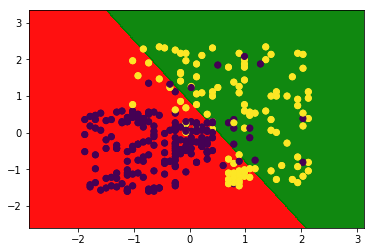

In [21]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1,step=0.01),
                     np.arange(start=X_set[:,1].min() - 1, stop=X_set[:,1].max() + 1,step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_train[:,0],X_train[:,1],c=y_train, label=j)

    
plt.show()    